In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
PATH = "./measurements/full-x4"

In [3]:
fechas=['2021-11-19_17-55-37']
data=[]

for i in fechas:
    data.append(pd.read_csv(f"{PATH}/{i}/figuras/area_{i}.csv"))

In [5]:
dt=1/4
x=np.arange(0,len(data[0]["# nro"])/4,dt) 

In [6]:
#AREAS
area1=[]
area2=[]
area3=[]
area4=[]

for i in range(len(fechas)):
    area1.append(np.array(data[i]['Area1']))
    area2.append(np.array(data[i]['Area2']))
    area3.append(np.array(data[i]['Area3']))
    area4.append(np.array(data[i]['Area4']))

area1=np.concatenate(area1)
area2=np.concatenate(area2)
area3=np.concatenate(area3)
area4=np.concatenate(area4)

In [14]:
area1/60

array([14359.625     , 12962.74166667, 11032.31666667,  8238.275     ,
       16798.28333333, 18173.075     , 17247.04166667, 16384.4       ,
       15552.84166667, 14243.81666667, 13088.53333333, 17865.79166667,
       25912.18333333, 20272.79166667, 17400.73333333, 39200.45      ,
       32189.95      , 21705.85833333, 17096.475     , 19767.95      ])

La fórmula es 
g= $\frac{F CT 44 g/mol}{22414 . 10^6 0.001L/mol}$

Con F el flujo (1.5L/min), CT el área bajo la curva en MINUTOS, como lo tenemos en segundos:

g= $\frac{F* CT/60 * 44 g/mol}{22414 . 10^6 0.001L/mol}$

In [8]:
F = 1.5
den = 22414 * 0.001 * 10 ** 6

def gramos(x): #meter el área
    return F * x * 44 / (den*60)


In [9]:
gramos1=np.array(gramos(area1))
gramos2=np.array(gramos(area2))
gramos3=np.array(gramos(area3))
gramos4=np.array(gramos(area4))

In [10]:
#Gramos acumulados, suponiendo que ese valor se produjo durante 6h
gramos1_ac=np.add.accumulate(gramos1*6)
gramos2_ac=np.add.accumulate(gramos2*6)
gramos3_ac=np.add.accumulate(gramos3*6)
gramos4_ac=np.add.accumulate(gramos4*6)

Cada área tomada fue de 25 minutos, por tanto, hacemos regla de 3 simples para comparar con el de titulacion (5.5h)

25 min ---- area

5.5h=330min ----

se debe multiplicar al eje Y por 330/25=13.2 ¿¿¿???

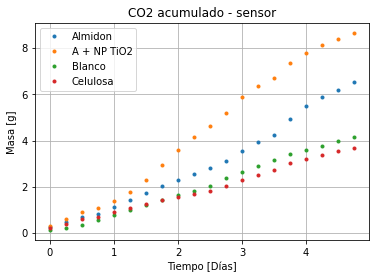

In [11]:
plt.plot(x,gramos1_ac,'.',label='Almidon')
plt.plot(x,gramos3_ac,'.',label='A + NP TiO2')
plt.plot(x,gramos4_ac,'.',label='Blanco')
plt.plot(x,gramos2_ac,'.',label='Celulosa')
plt.legend()
plt.title('CO2 acumulado - sensor')
plt.xlabel('Tiempo [Días]')
plt.ylabel('Masa [g]')
plt.grid(True)
plt.savefig("co2_acumulado-sensor_segunda-medicion.png")
plt.show()

# Segundo intento

In [ ]:
# Voy a hacer uno a la vez

In [ ]:
c=area3/(25*60) #concentración en un momento dado

In [ ]:
plt.scatter(x,c)
plt.title('Concentración de CO2 cada 6h')
plt.xlabel('Tiempo [días]')
plt.ylabel('Concentración [ppm]')
plt.grid(True)
plt.show()

In [ ]:
#Tomo el valor medio entre un punto y el otro, para calcular la concentración promedio en cada intervalo

c_mean=[]
for i in range(len(c)-1):
    c_mean.append(([c[i]]+c[i+1])/2)

In [ ]:
plt.scatter(x,c)
plt.scatter(x[:-1]+0.25/2,c_mean)
plt.title('Concentración de CO2 cada 6h')
plt.xlabel('Tiempo [días]')
plt.ylabel('Concentración [ppm]')
plt.grid(True)
plt.show()

In [ ]:
#Con ese promedio, estimo que ese fue el valor en la ventana de 6h
g=1.2*np.array(c_mean)*44*6*60/(22414*0.001*10**6)

In [ ]:
plt.scatter(x[:-1]+0.25/2,g)
plt.title('Masa de CO2 emitido cada 6h')
plt.xlabel('Tiempo [días]')
plt.ylabel('Masa [g]')
plt.grid(True)
plt.show()

In [ ]:
plt.scatter(x[:-1]+0.25/2,np.add.accumulate(g))
plt.title('Evolución de CO2 acumulativo')
plt.xlabel('Tiempo [días]')
plt.ylabel('Masa [g]')
plt.grid(True)
plt.show()

In [ ]:
#Calculo las concentraciones promedio
c_1=area1/(25*60)
c_2=area2/(25*60)
c_3=area3/(25*60)
c_4=area4/(25*60)

In [ ]:
plt.title('Concentración promedio')
plt.plot(x,c_1,'.')
plt.plot(x,c_2,'.')
plt.plot(x,c_3,'.')
plt.plot(x,c_4,'.')
plt.grid(True)
plt.show()

Según la tesis, toma el valor medio entre un punto y el otro; y ese es el valor para todo ese intervalo de tiempo
A= (C[n] + C[n+1] ) * (t[n] - t[n-1]) /2

In [ ]:
CT_1=[] #en minutos
CT_2=[]
CT_3=[]
CT_4=[]

for i in range(len(c_1)-1):
    CT_1.append((c_1[i]+c_1[i+1])*6*60/2)
    CT_2.append((c_2[i]+c_2[i+1])*6*60/2)
    CT_3.append((c_3[i]+c_3[i+1])*6*60/2)
    CT_4.append((c_4[i]+c_4[i+1])*6*60/2)

In [ ]:
gramos1=np.array(gramos(np.array(CT_1)))
gramos2=np.array(gramos(np.array(CT_2)))
gramos3=np.array(gramos(np.array(CT_3)))
gramos4=np.array(gramos(np.array(CT_4)))

In [ ]:
gramos1_ac=[gramos1[0]]
gramos2_ac=[gramos2[0]]
gramos3_ac=[gramos3[0]]
gramos4_ac=[gramos4[0]]


for i in range(len(gramos1)-1):
    gramos1_ac.append(gramos1_ac[i]+gramos1[i+1])
    gramos2_ac.append(gramos2_ac[i]+gramos2[i+1])
    gramos3_ac.append(gramos3_ac[i]+gramos3[i+1])
    gramos4_ac.append(gramos4_ac[i]+gramos4[i+1])

In [ ]:
plt.title('Concentración promedio')
plt.plot(x[:-1]+0.25/2,gramos1_ac,'.')
plt.plot(x[:-1]+0.25/2,gramos2_ac,'.')
plt.plot(x[:-1]+0.25/2,gramos3_ac,'.')
plt.plot(x[:-1]+0.25/2,gramos4_ac,'.')
plt.grid(True)
plt.show()